In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
data=pd.read_csv('Mall_Customers.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.shape

(200, 5)

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
data.isnull().any()  

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

# Explorartory Data Analysis

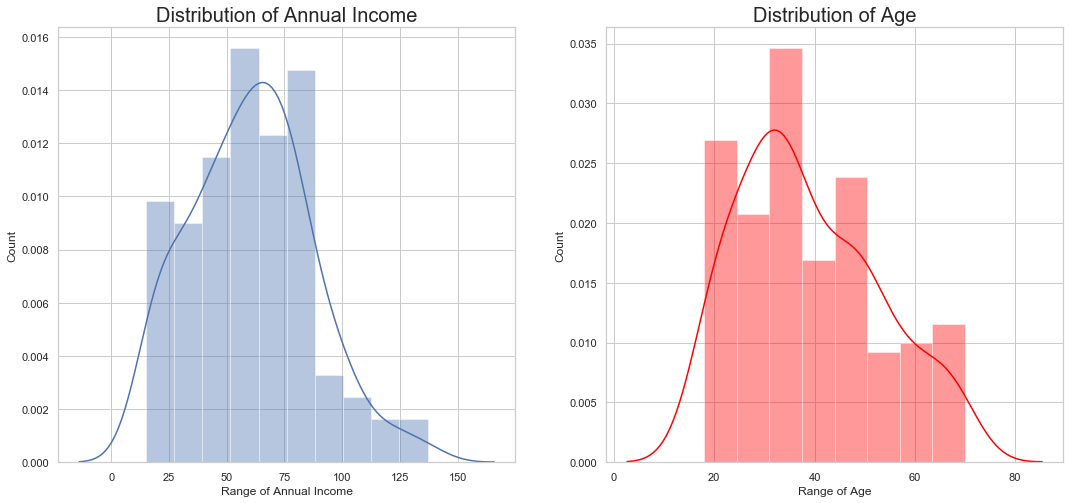

In [32]:
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count');

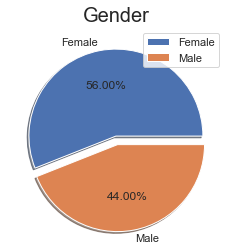

In [36]:
plt.rcParams['figure.figsize'] = (4, 4)
plt.pie(data['Gender'].value_counts(),explode = [0, 0.1], labels =['Female', 'Male'],shadow=True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend();

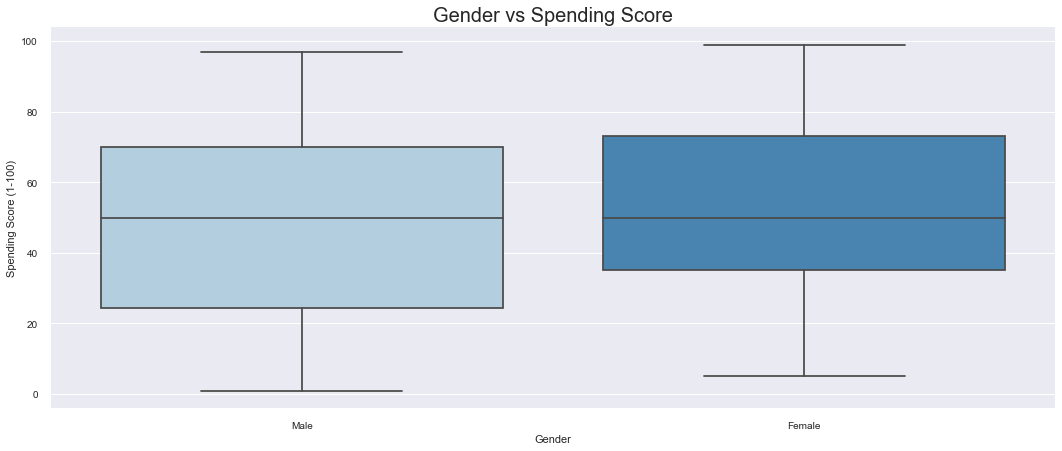

In [55]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20);

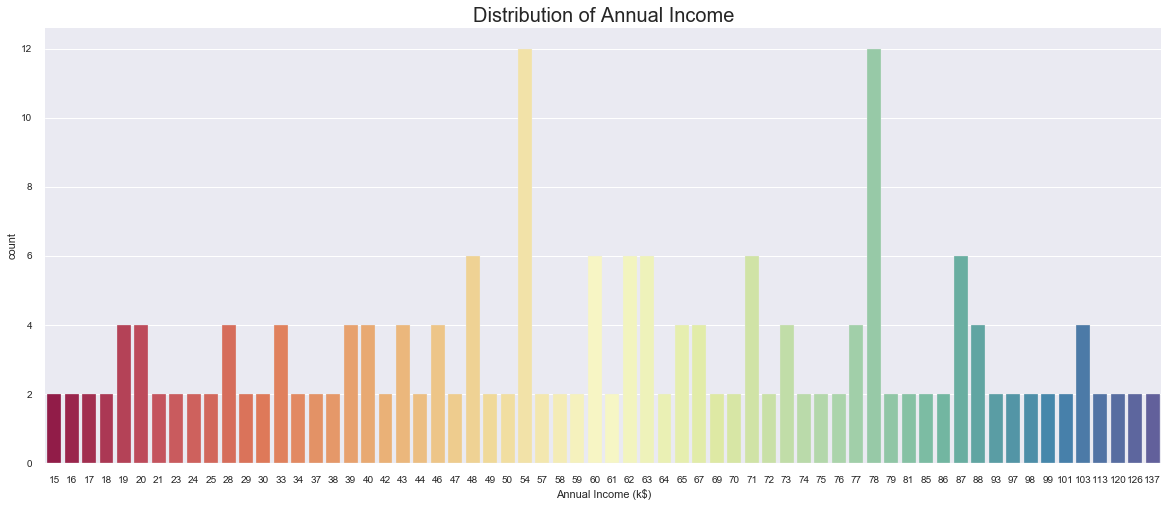

In [48]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Annual Income (k$)'],palette='Spectral')
plt.title('Distribution of Annual Income', fontsize = 20);

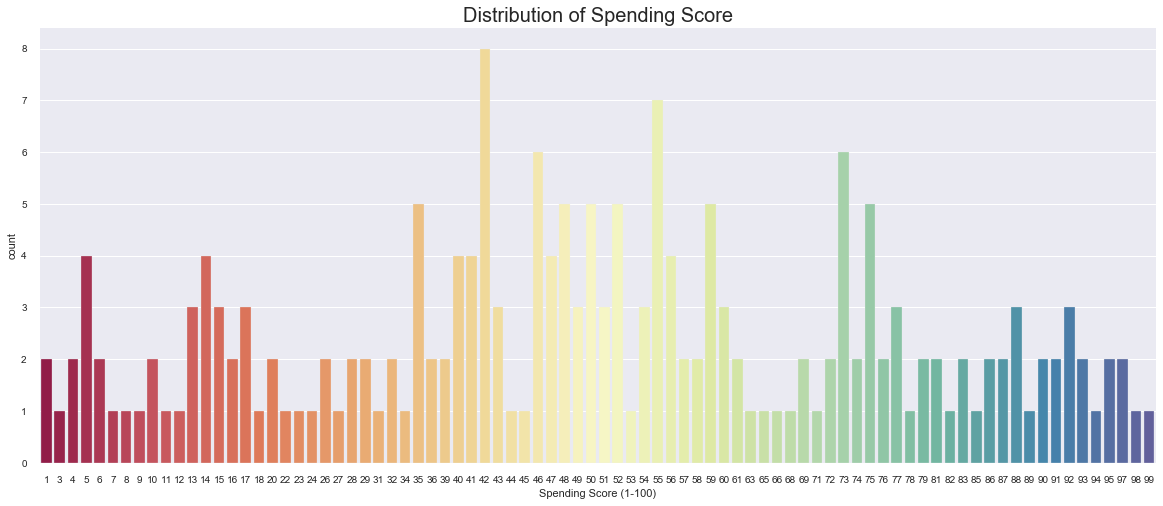

In [49]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Spending Score (1-100)'],palette='Spectral')
plt.title('Distribution of Spending Score', fontsize = 20);

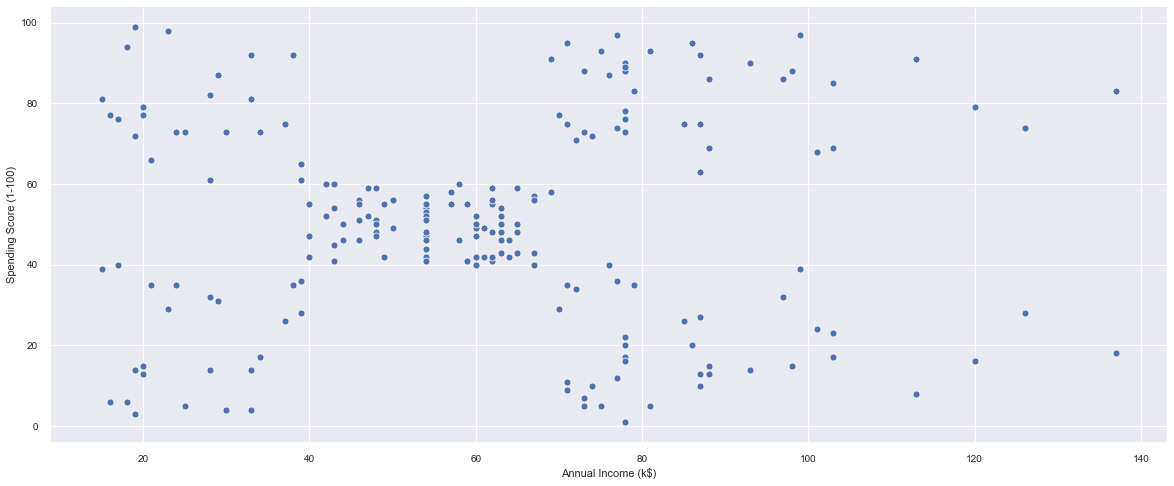

In [54]:
sns.scatterplot(data['Annual Income (k$)'],data['Spending Score (1-100)']);

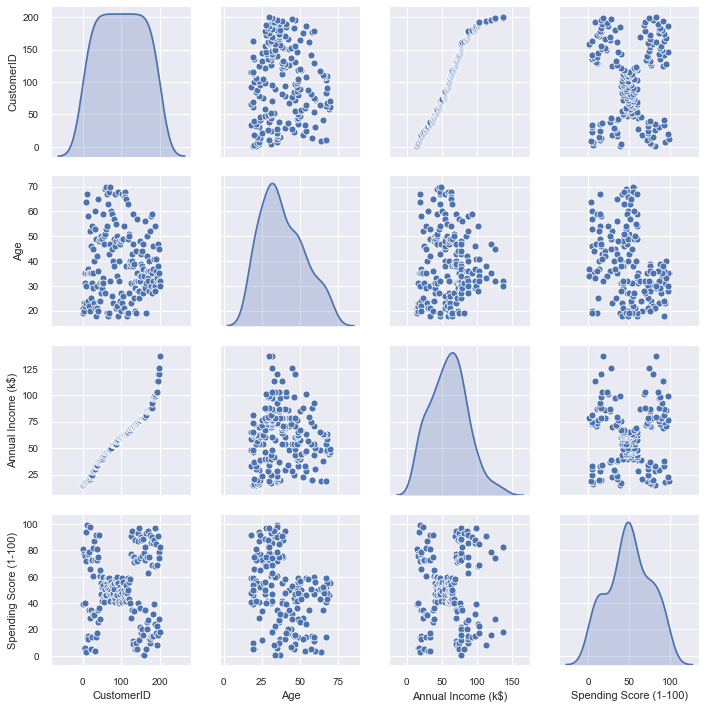

In [51]:
sns.pairplot(data,diag_kind='kde');

In [58]:
data1=data[['Annual Income (k$)','Spending Score (1-100)']]

In [60]:
data1_scaled=data1.apply(zscore)

In [71]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(data1_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

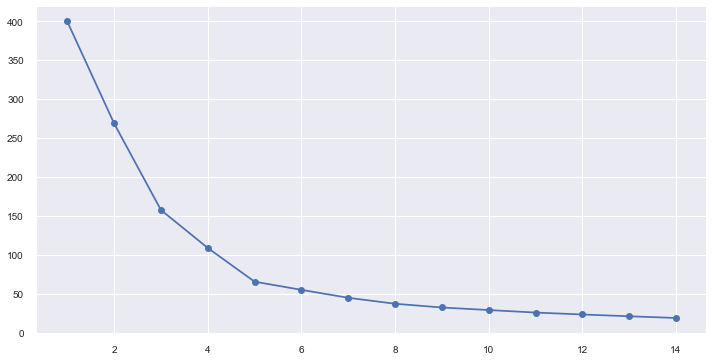

In [70]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );


From the above elbow plot we can see that the optimum number of clusters we obtain is 5. We can further check this using Sihouette Score.

In [114]:
kmeans = KMeans(n_clusters=5, n_init = 15, random_state=2)
kmeans.fit(data1_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [97]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')
data1_labeled = data1_scaled.join(df_labels)
data1_labeled.head()

,Annual Income (k$),Spending Score (1-100),labels
0,-1.738999,-0.434801,3
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,3
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,3


<Figure size 504x504 with 0 Axes>

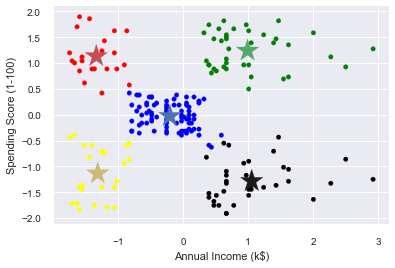

In [122]:
colors=['red','green','blue','yellow','black']
plt.figure(figsize=(7,7))
data1_labeled['colors']=data1_labeled['labels'].map(lambda p: colors[p])
centeroids=pd.DataFrame(kmeans.cluster_centers_,columns=['Annual Income (k$)','Spending Score (1-100)'])

ax=data1_labeled.plot(kind='scatter',x='Annual Income (k$)',y='Spending Score (1-100)',c=data1_labeled['colors'])

centeroids.plot(kind='scatter',x='Annual Income (k$)',y='Spending Score (1-100)',
                marker='*',c=['r','g','b','y','k'],s=550,ax=ax)
plt.show()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.29512063001659344


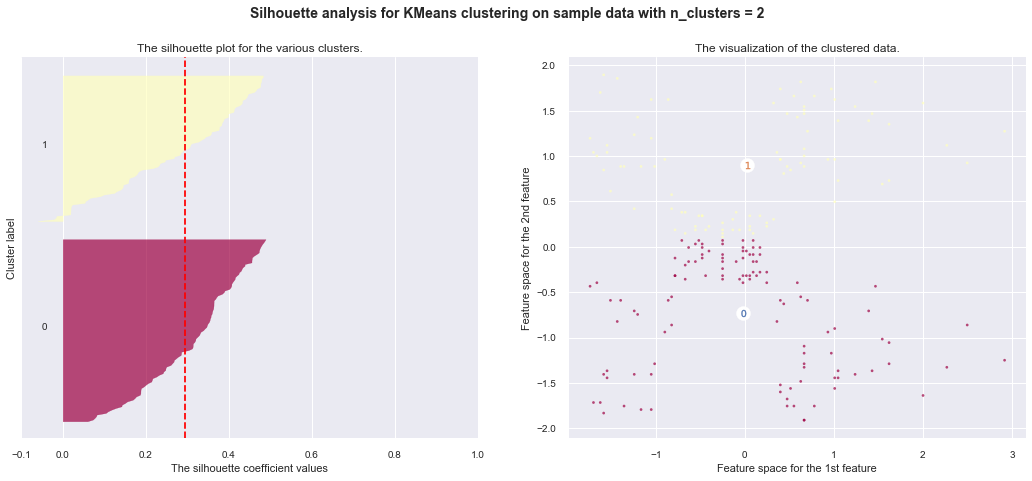

For n_clusters = 3 The average silhouette_score is : 0.46658474419000145


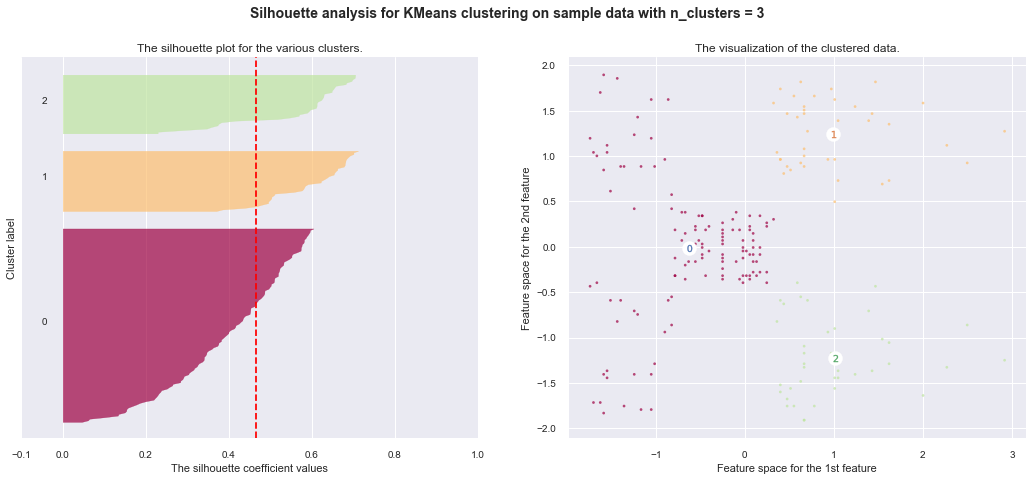

For n_clusters = 4 The average silhouette_score is : 0.4939069237513199


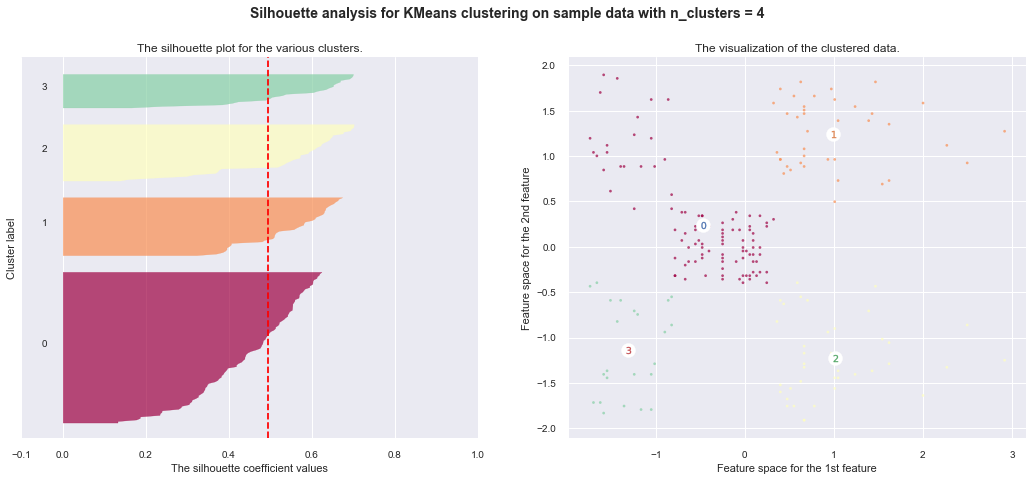

For n_clusters = 5 The average silhouette_score is : 0.5546571631111091


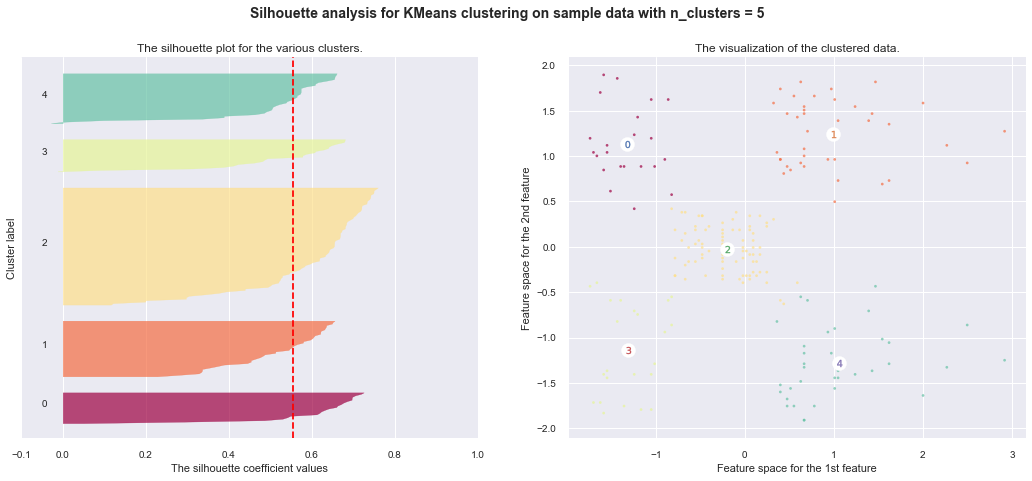

For n_clusters = 6 The average silhouette_score is : 0.5398800926790663


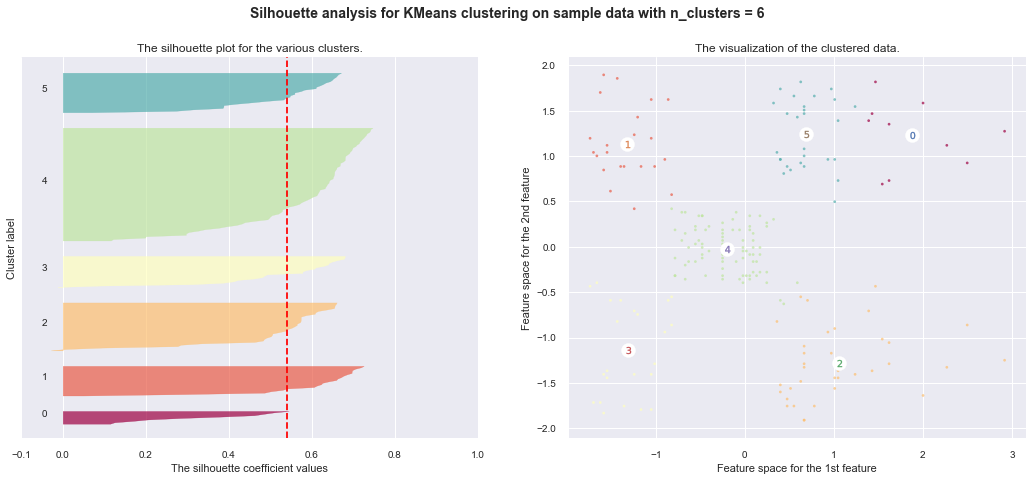

For n_clusters = 7 The average silhouette_score is : 0.5273963610540069


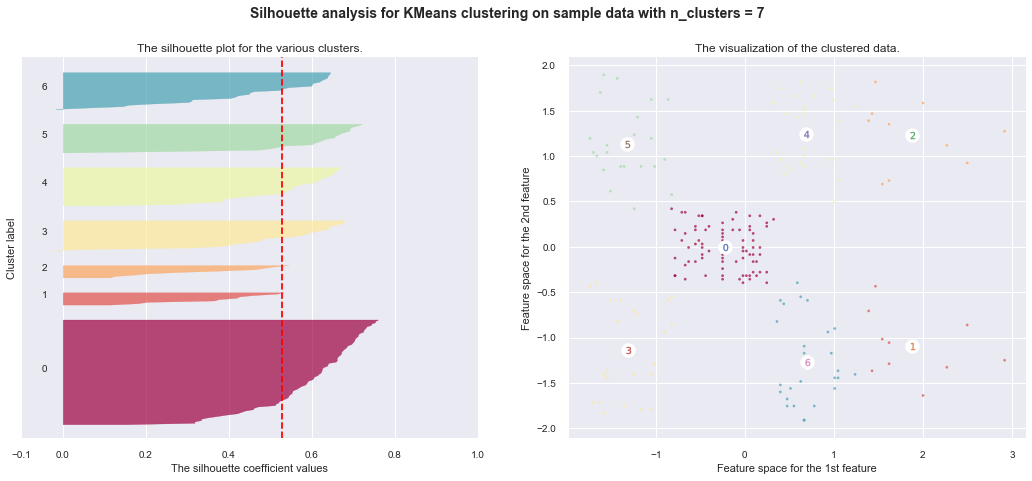

For n_clusters = 8 The average silhouette_score is : 0.4564946059831134


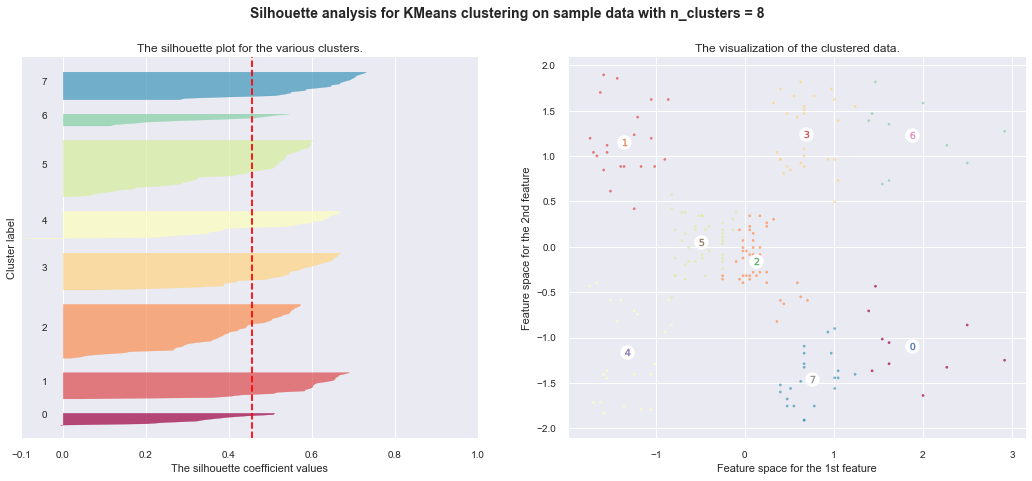

For n_clusters = 9 The average silhouette_score is : 0.4586010456814279


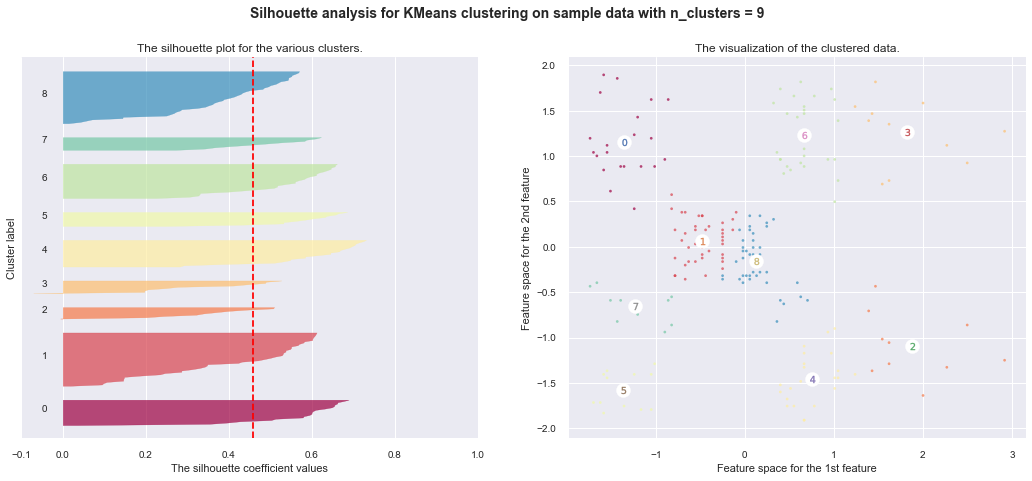

For n_clusters = 10 The average silhouette_score is : 0.4476280825932578


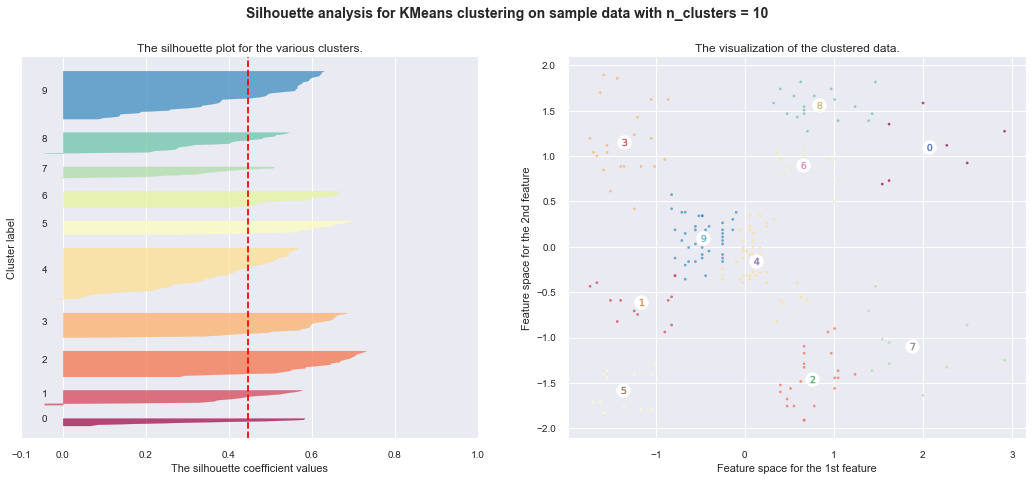

For n_clusters = 11 The average silhouette_score is : 0.45176913842690014


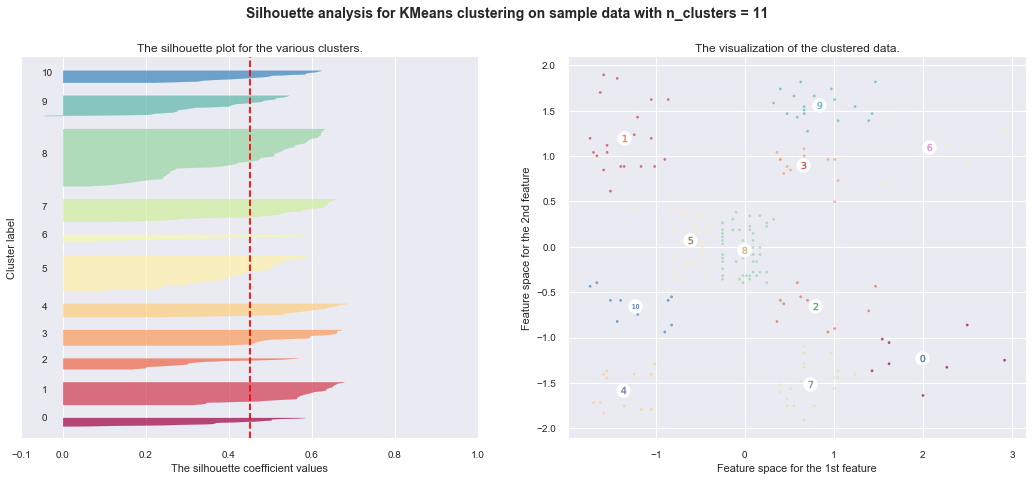

For n_clusters = 12 The average silhouette_score is : 0.427808763007104


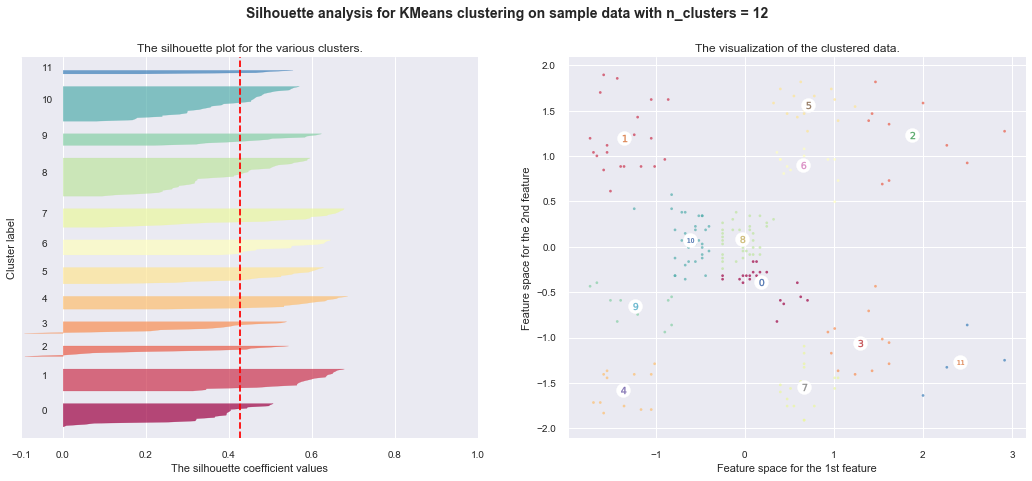

For n_clusters = 13 The average silhouette_score is : 0.41767913161824466


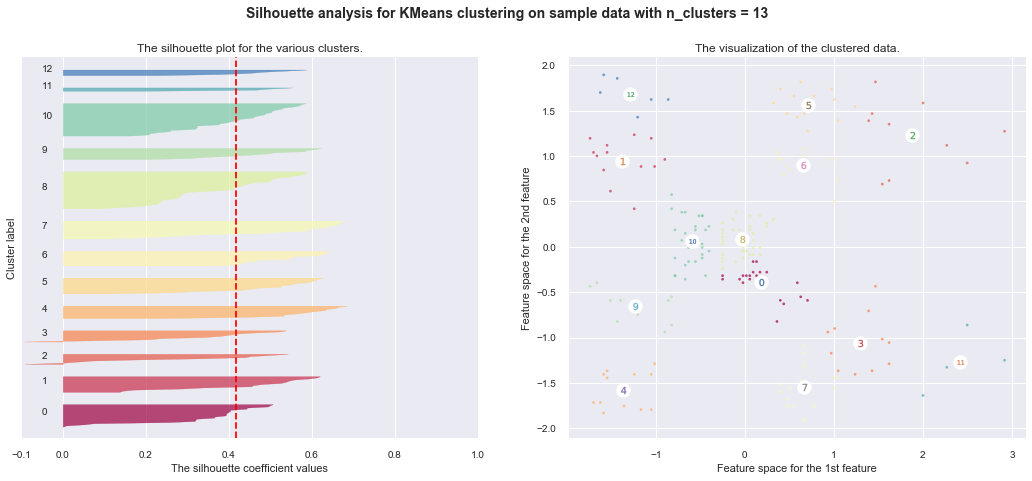

For n_clusters = 14 The average silhouette_score is : 0.4219545081607261


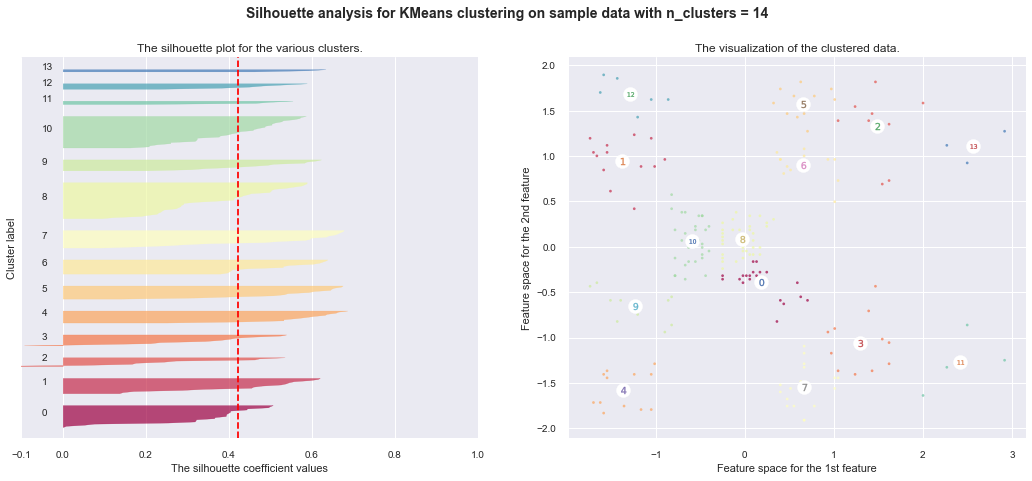

For n_clusters = 15 The average silhouette_score is : 0.42844386863415834


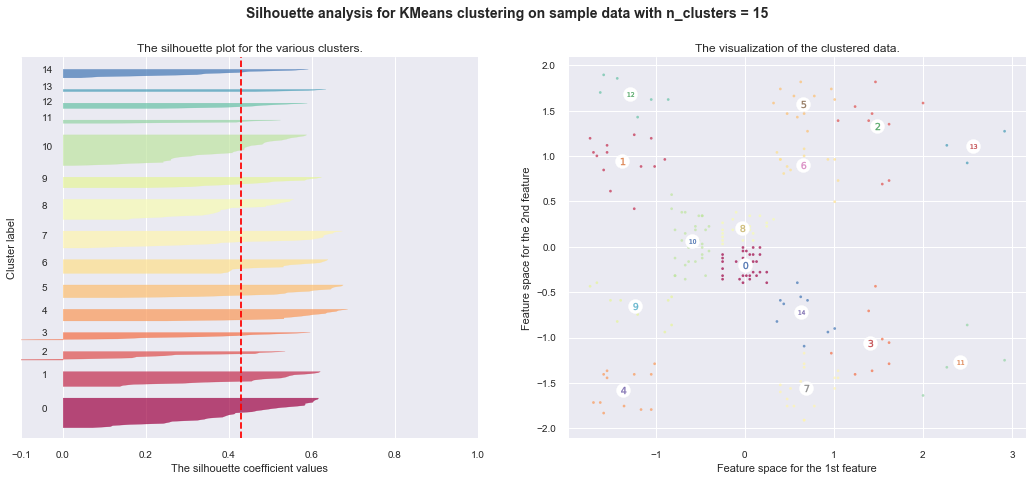

In [66]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=data1_scaled.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [ ]:
From above we can see that get the best silhouette score at n_clusters=5.

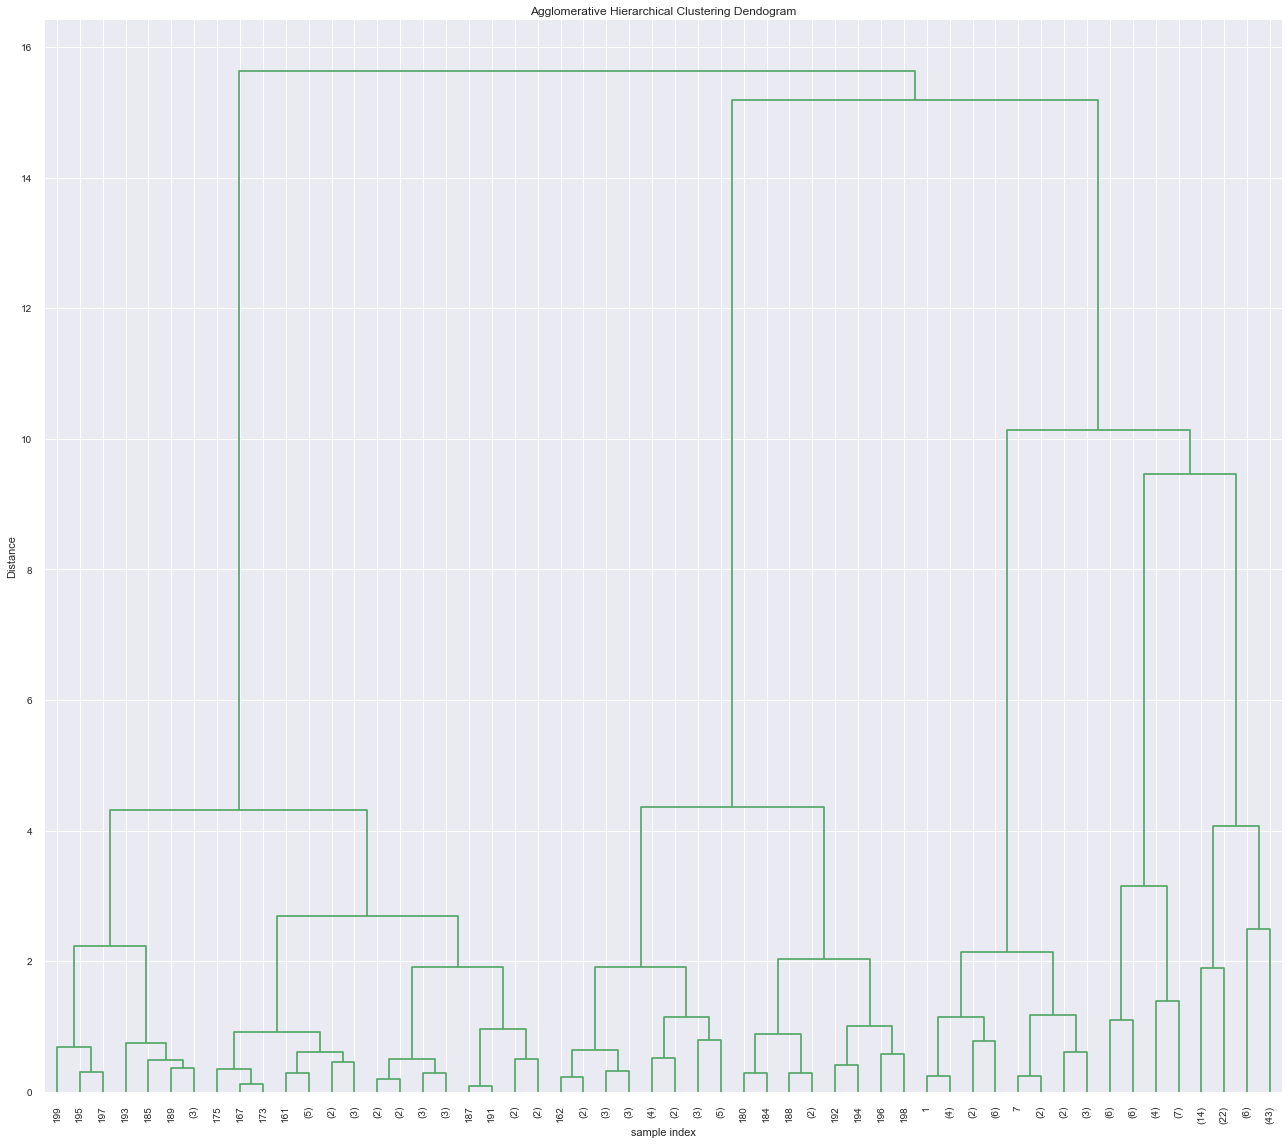

In [123]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(data1_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=70,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [ ]:
From the above Dendogram we can see that evidently we have 5 clusters and the customers can be segmented accordingly.
From the mall poiint of view they should target the customers with mostly  medium annual income and medium annual spend
and also the  Customers with high annual income and high annual spend.